<a href="https://colab.research.google.com/github/ABHISHEKSONI121/Food-Classification/blob/main/experiment1_food00Dataset_simpleNetwork_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense , Flatten ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "dataset_00/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='validation',
                                             seed=42)

Found 21000 files belonging to 21 classes.
Using 18900 files for training.
Found 21000 files belonging to 21 classes.
Using 2100 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['apple_pie', 'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros', 'crab_cakes', 'cup_cakes', 'donuts', 'dumplings', 'edamame', 'french_fries', 'fried_rice', 'garlic_bread', 'greek_salad', 'grilled_salmon', 'hot_dog', 'ice_cream', 'pancakes', 'samosa', 'sashimi']


In [ ]:
IMG_SIZE = 160

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
initial_epochs=5
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs, callbacks=[cp_callback])

Epoch 1/5
591/591 [==============================] - ETA: 0s - loss: 2.6893 - accuracy: 0.1730
Epoch 1: saving model to training_2\cp.ckpt
591/591 [==============================] - 328s 496ms/step - loss: 2.6893 - accuracy: 0.1730 - val_loss: 2.5634 - val_accuracy: 0.2090
Epoch 2/5
591/591 [==============================] - ETA: 0s - loss: 2.4072 - accuracy: 0.2467
Epoch 2: saving model to training_2\cp.ckpt
591/591 [==============================] - 277s 469ms/step - loss: 2.4072 - accuracy: 0.2467 - val_loss: 2.3247 - val_accuracy: 0.2638
Epoch 3/5
591/591 [==============================] - ETA: 0s - loss: 2.2840 - accuracy: 0.2916
Epoch 3: saving model to training_2\cp.ckpt
591/591 [==============================] - 254s 429ms/step - loss: 2.2840 - accuracy: 0.2916 - val_loss: 2.2884 - val_accuracy: 0.2986
Epoch 4/5
591/591 [==============================] - ETA: 0s - loss: 2.1832 - accuracy: 0.3235
Epoch 4: saving model to training_2\cp.ckpt
591/591 [==============================

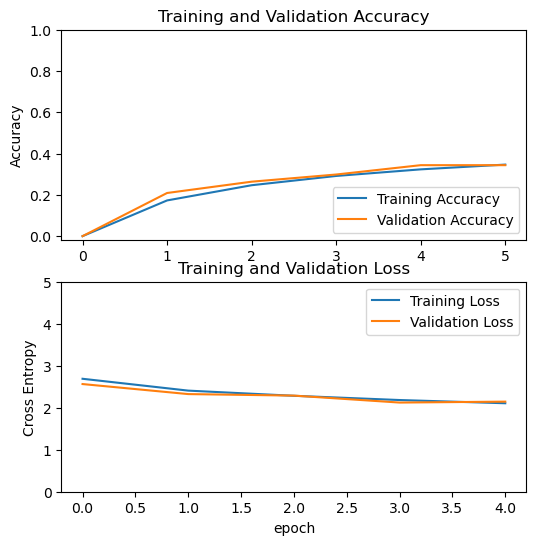

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
new_epochs = 5
total_epochs = initial_epochs + new_epochs
history_new1 = model.fit(train_dataset, validation_data=validation_dataset, epochs=total_epochs , initial_epoch = history.epoch[-1] , callbacks=[cp_callback])

Epoch 5/10
591/591 [==============================] - ETA: 0s - loss: 2.0273 - accuracy: 0.3658
Epoch 5: saving model to training_2\cp.ckpt
591/591 [==============================] - 260s 440ms/step - loss: 2.0273 - accuracy: 0.3658 - val_loss: 2.0541 - val_accuracy: 0.3805
Epoch 6/10
591/591 [==============================] - ETA: 0s - loss: 1.9593 - accuracy: 0.3899
Epoch 6: saving model to training_2\cp.ckpt
591/591 [==============================] - 236s 399ms/step - loss: 1.9593 - accuracy: 0.3899 - val_loss: 1.9663 - val_accuracy: 0.4095
Epoch 7/10
591/591 [==============================] - ETA: 0s - loss: 1.9014 - accuracy: 0.4135
Epoch 7: saving model to training_2\cp.ckpt
591/591 [==============================] - 270s 456ms/step - loss: 1.9014 - accuracy: 0.4135 - val_loss: 1.9271 - val_accuracy: 0.4133
Epoch 8/10
591/591 [==============================] - ETA: 0s - loss: 1.8450 - accuracy: 0.4287
Epoch 8: saving model to training_2\cp.ckpt
591/591 [==========================

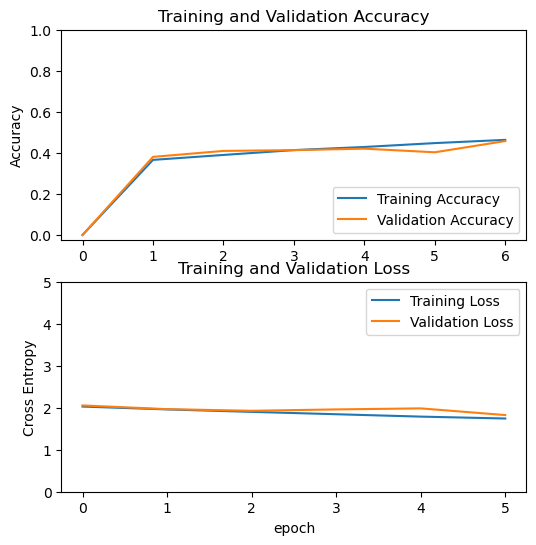

In [ ]:
acc = [0.] + history_new1.history['accuracy']
val_acc = [0.] + history_new1.history['val_accuracy']

loss = history_new1.history['loss']
val_loss = history_new1.history['val_loss']
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
new_epochs = 10
total_epochs =  20
history_new2 = model.fit(train_dataset, validation_data=validation_dataset, epochs=total_epochs , initial_epoch = history_new1.epoch[-1] , callbacks=[cp_callback])

Epoch 10/20
591/591 [==============================] - ETA: 0s - loss: 1.7113 - accuracy: 0.4697
Epoch 10: saving model to training_2\cp.ckpt
591/591 [==============================] - 208s 353ms/step - loss: 1.7113 - accuracy: 0.4697 - val_loss: 1.8412 - val_accuracy: 0.4614
Epoch 11/20
591/591 [==============================] - ETA: 0s - loss: 1.6740 - accuracy: 0.4819
Epoch 11: saving model to training_2\cp.ckpt
591/591 [==============================] - 228s 386ms/step - loss: 1.6740 - accuracy: 0.4819 - val_loss: 1.8088 - val_accuracy: 0.4567
Epoch 12/20
591/591 [==============================] - ETA: 0s - loss: 1.6428 - accuracy: 0.4885
Epoch 12: saving model to training_2\cp.ckpt
591/591 [==============================] - 216s 365ms/step - loss: 1.6428 - accuracy: 0.4885 - val_loss: 1.8330 - val_accuracy: 0.4610
Epoch 13/20
591/591 [==============================] - ETA: 0s - loss: 1.6218 - accuracy: 0.5011
Epoch 13: saving model to training_2\cp.ckpt
591/591 [==================

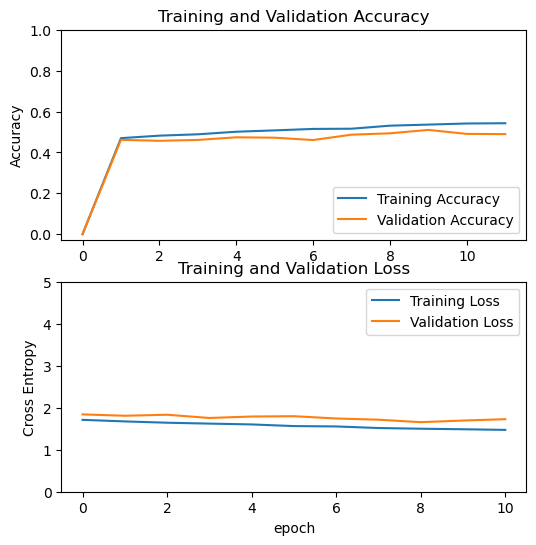

In [ ]:
acc = [0.] + history_new2.history['accuracy']
val_acc = [0.] + history_new2.history['val_accuracy']

loss = history_new2.history['loss']
val_loss = history_new2.history['val_loss']
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# new_epochs = 10
total_epochs =  25
history_new3 = model.fit(train_dataset, validation_data=validation_dataset, epochs=total_epochs , initial_epoch = history_new2.epoch[-3] , callbacks=[cp_callback])

Epoch 18/25
591/591 [==============================] - ETA: 0s - loss: 1.4513 - accuracy: 0.5493
Epoch 18: saving model to training_2\cp.ckpt
591/591 [==============================] - 206s 348ms/step - loss: 1.4513 - accuracy: 0.5493 - val_loss: 1.7519 - val_accuracy: 0.4848
Epoch 19/25
591/591 [==============================] - ETA: 0s - loss: 1.4260 - accuracy: 0.5571
Epoch 19: saving model to training_2\cp.ckpt
591/591 [==============================] - 219s 371ms/step - loss: 1.4260 - accuracy: 0.5571 - val_loss: 1.6980 - val_accuracy: 0.5090
Epoch 20/25
591/591 [==============================] - ETA: 0s - loss: 1.4080 - accuracy: 0.5643
Epoch 20: saving model to training_2\cp.ckpt
591/591 [==============================] - 209s 354ms/step - loss: 1.4080 - accuracy: 0.5643 - val_loss: 1.6867 - val_accuracy: 0.5067
Epoch 21/25
591/591 [==============================] - ETA: 0s - loss: 1.4034 - accuracy: 0.5619
Epoch 21: saving model to training_2\cp.ckpt
591/591 [==================

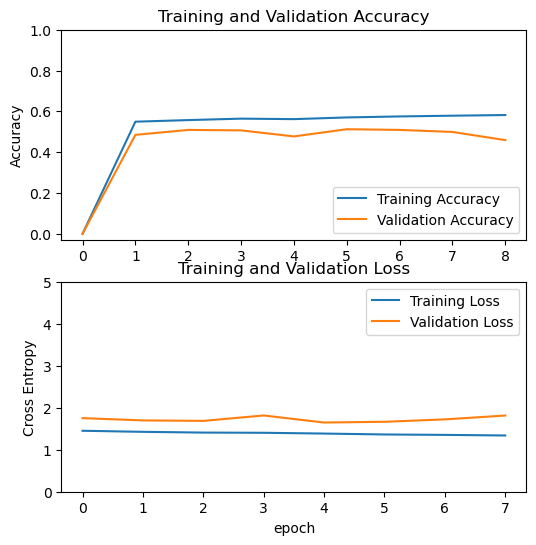

In [ ]:
acc = [0.] + history_new3.history['accuracy']
val_acc = [0.] + history_new3.history['val_accuracy']

loss = history_new3.history['loss']
val_loss = history_new3.history['val_loss']
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()